# Agglomerative (Hierarchical) Clustering

## Table of Contents

### 1. What is Agglomerative Clustering?

### 2. Agglomerative Clustering in Scikit-Learn

### 3. Evaluation of Clustering

### 4. Important Considerations for Agglomerative Clustering

## 1. What is Agglomerative Clustering?

A hierarchical clustering method that builds a tree (dendrogram) of clusters.

“Agglomerative” means bottom-up:

- Start with each point as its own cluster

- Iteratively merge the two closest clusters

- Repeat until all points are merged into one cluster or a desired number of clusters is reached

Result: a dendrogram (tree diagram showing cluster merges)

Goal: Understand **hierarchical relationships** between data points.

**Unlike K-Means, it does not require random initialization, so results are deterministic given the same parameters**


## 2. Agglomerative Clustering in Scikit-Learn

The name of the class for Agglomerative Clustering in Scikit-Learn
  **sklearn.cluster.AgglomerativeClustering**


## **AgglomerativeClustering Parameters Explained (scikit-learn)**

### **Most Important Parameters**

### `1. n_clusters`
-  The number of clusters to form. Determines how many groups the algorithm will merge the points into.  
- default=2
- If you also set `distance_threshold`, this parameter is ignored because merging is stopped based on distance rather than cluster count.  

### `2.metric`

Distance metric used to calculate similarity between points. Determines which points are “close” to each other.

**Common Options:**  
  - `euclidean` (default) → straight-line distance; most common for numeric features.  
  - `manhattan` → sum of absolute differences; robust to outliers.  
  - `cosine` → measures angle between vectors; useful for text embeddings   

### `3. linkage`

Determines how the distance between **clusters** is computed during merging  

**Options**  

  - `ward` (default) → merges clusters that **minimize the variance** of combined cluster; produces compact, round clusters. Only works with Euclidean distance

  - `complete` → distance = **maximum distance** between any two points across clusters. Produces **tight, well-separated clusters**

  - `average` → distance = **average of all pairwise distances** between points in the two clusters. Balanced behavior between single and complete linkage

Different linkages affect **cluster shape, size and sensitivity to noise**  




**Important rules and constraints:**
- If `linkage="ward"`, **only `"euclidean"` is allowed**  
  (because Ward’s method relies on variance minimization).

Choice of metric affects which points are considered “close” and thus which clusters are merged first  


### **Occasionally Used Parameters**

### `distance_threshold`

Stops merging clusters when the distance between clusters exceeds this threshold.

**Options:** float (default=None)  

- Useful when you want a **hierarchy** and do not know the number of clusters in advance

- Example: `distance_threshold=5` → any clusters separated by more than 5 units will **not merge**, creating more clusters automatically

- If set, `n_clusters` is ignored  


### `compute_full_tree`

Determines whether the full clustering tree is computed. Needed for dendrogram plotting.  

**Options**  (default=auto)
  - `auto` → computes full tree only when needed (e.g., small datasets or dendrogram)
  - `True` → always compute the full tree; useful for plotting dendrograms  
  - `False` → skips computing full tree to save memory and computation for large datasets

### Apply Agglomerative Clustering to a simple Dataset

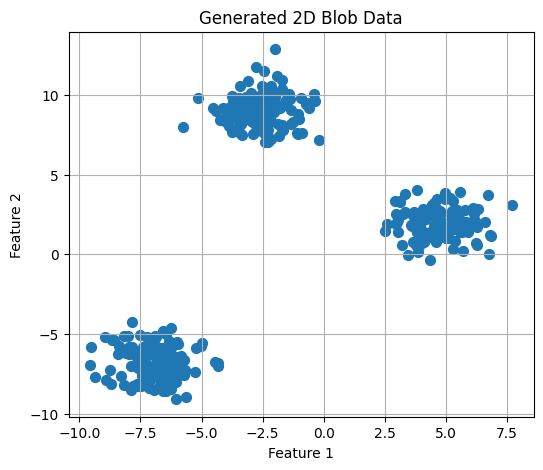

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.metrics import silhouette_score

# Generate 400 points in 2D, 3 clusters
X, y = make_blobs(n_samples=400, n_features=2, centers=3, random_state=42)

# Plot the raw data
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated 2D Blob Data")
plt.grid(True)
plt.show()

Silhouette Score: 0.8458787585795497


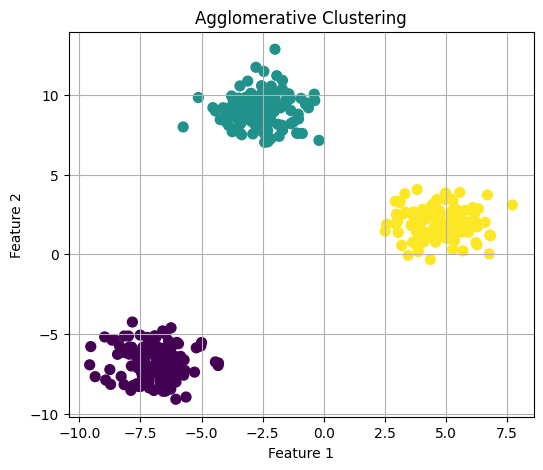

In [2]:
# Create the model
agg = AgglomerativeClustering(
    n_clusters=3,       # we know 3 clusters exist
    metric='euclidean',  # distance metric
    linkage='ward'          # linkage method
)

# Fit and predict cluster labels
labels = agg.fit_predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)
# Plot clustered data
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()

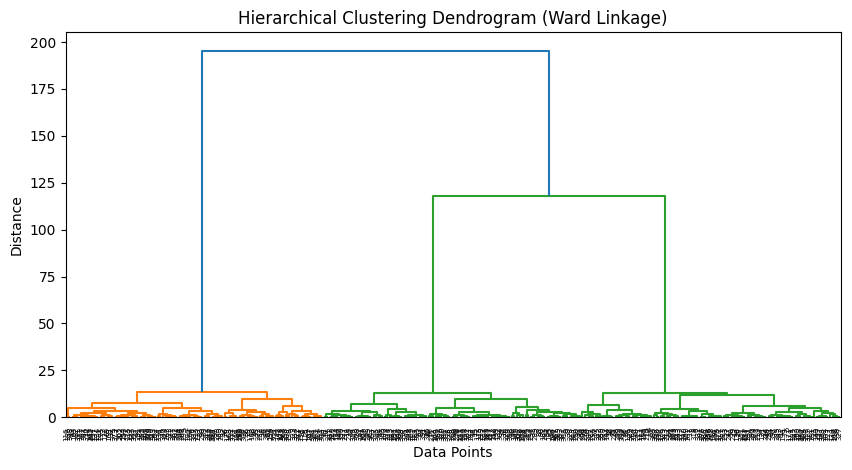

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

#### How to Interpret the Dendrogram

- Each leaf → one data point

- Each merge → two clusters being combined

- The height of a merge → distance between clusters

#### Choosing the Number of Clusters

- Draw a horizontal line across the dendrogram

- Count how many vertical branches it cuts

### Rule of thumb:

Choose the cut where there is a large vertical gap
(big jump in distance before clusters merge)

## Important Considerations for Agglomerative Clustering

### When to Use Agglomerative Clustering

**- Does not require specifying K upfront:**  
Hierarchical clustering can build a full hierarchy of clusters and allows you to decide the number of clusters later by cutting the dendrogram at a chosen level.

**- Works well with small to medium datasets:**  
Because it computes distances between many pairs of points, it is more suitable when the dataset is not extremely large.

**- Useful for understanding data structure:**  
The dendrogram provides a visual explanation of how data points are grouped, making it useful for exploratory analysis.

**- Flexible cluster shapes (linkage):**  
Different linkage methods allow the algorithm to capture different types of cluster structures


### Limitations of Agglomerative Clustering

**- Computationally expensive:**  
Agglomerative clustering has higher time and memory complexity, making it impractical for very large datasets

**- Sensitive to noise and outliers:**  
Outliers can form their own clusters or distort the merging process

**- Early decisions cannot be undone:**  
Once two clusters are merged, the algorithm cannot reconsider that decision later, which may lead to suboptimal clusters

**- Results depend heavily on linkage choice:**  
Different linkage methods can produce very different clusterings, so parameter selection is critical

## Task 2A: Agglomerative Clustering

In this task, you will apply **Agglomerative Clustering** to `CC GENERAL` dataset and follow **the same methodology** used in the previous clustering lab

## **1. Exploratory Data Analysis (EDA)**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
df = pd.read_csv("CC GENERAL.csv")
df.head()
df.info()
df.shape

<class 'pandas.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   str    
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHASES_TRX    

(8950, 18)

In [5]:
# -----------------------------------------
# Select numeric features automatically
# -----------------------------------------
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Features:")
print(numeric_features)
# Select columns with object data type (typically categorical or string)
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
print(categorical_features)

# Print number of numeric features
print("Number of Numeric Features:", len(numeric_features))
# Print number of categorical features
print("Number of Categorical Features:", len(categorical_features))
# Print total number of features
print("Total Number of Features:", df.shape[1])

# The dataset consists mainly of numeric features representing credit card usage behavior.
# There is only one categorical feature (CUST_ID), which serves as a unique identifier and does not carry analytical value for clustering.


Numeric Features:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='str')

Categorical Features:
Index(['CUST_ID'], dtype='str')
Number of Numeric Features: 17
Number of Categorical Features: 1
Total Number of Features: 18


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15508\618100440.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = df.select_dtypes(include=['object']).columns


Statistical Summary of Numeric Features:


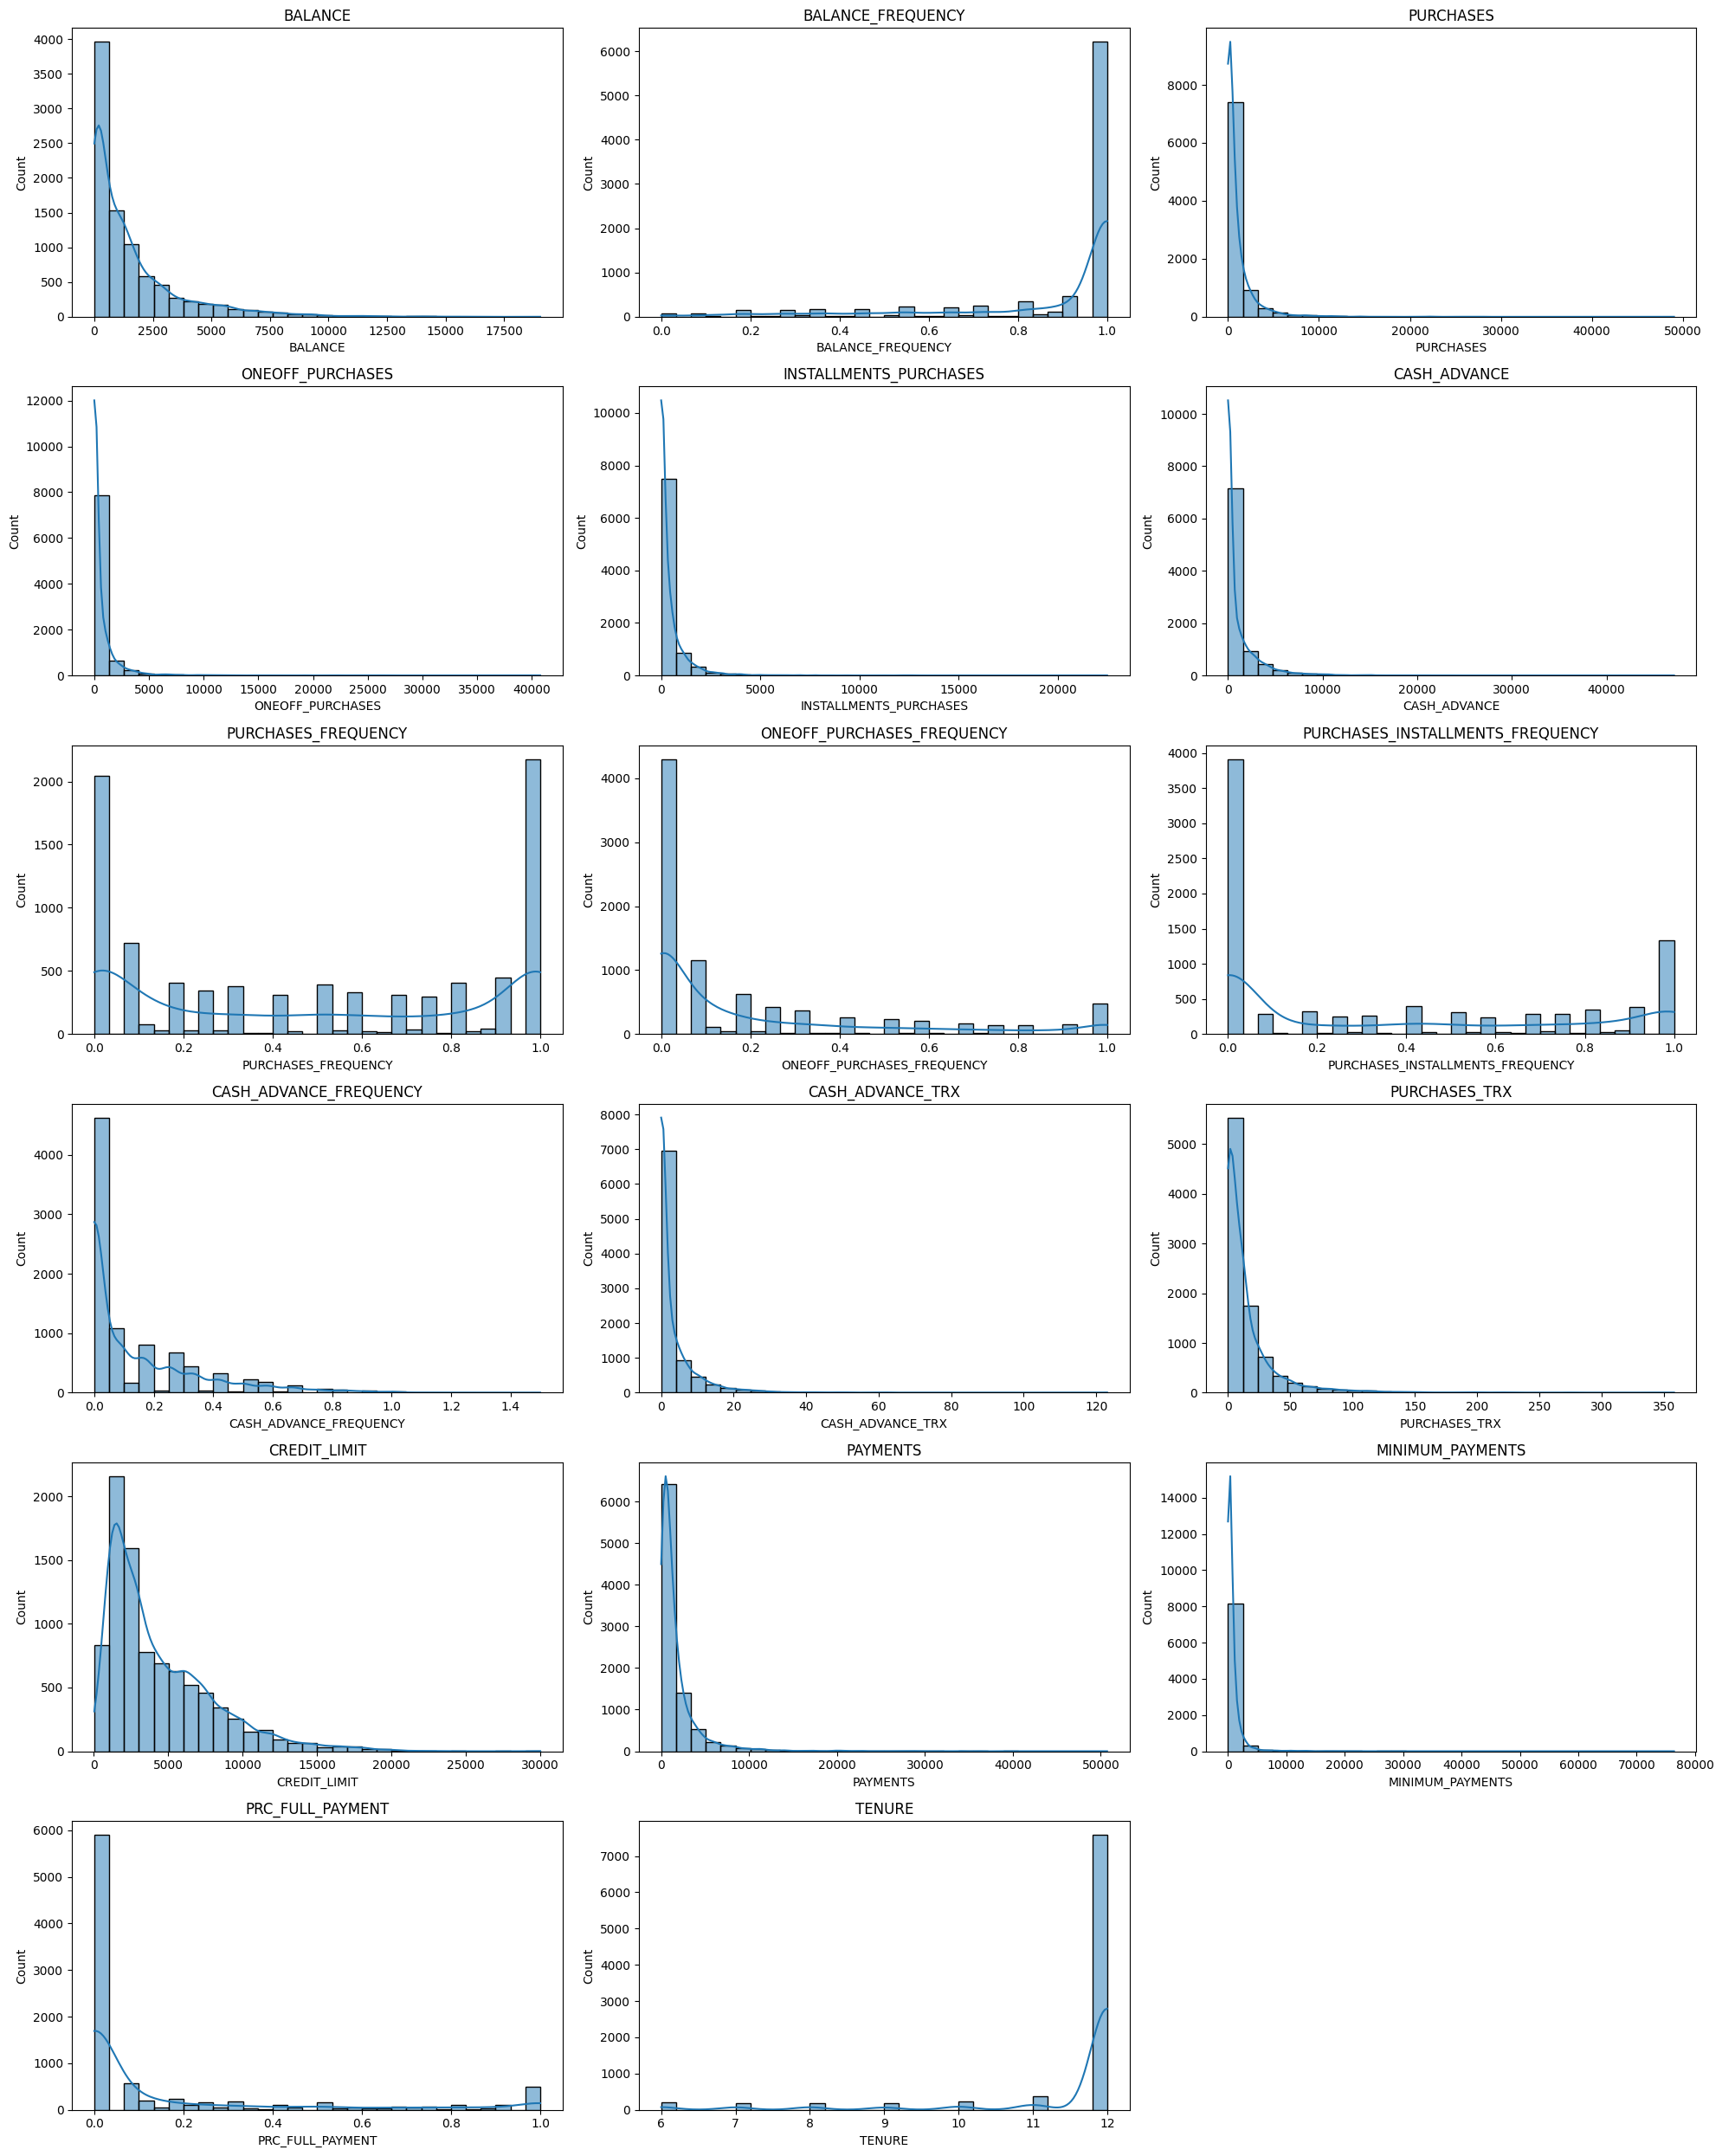

In [6]:
# -----------------------------------------
# Analyze Distribution of Numeric Features
# -----------------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])
basic_stats = numeric_df.describe()
skewness = numeric_df.skew()
basic_stats = basic_stats.T
basic_stats["skewness"] = skewness
print("Statistical Summary of Numeric Features:")
basic_stats
# ==============================
# Plot Distributions
# ==============================
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 25))
for i, column in enumerate(numeric_df.columns):
    plt.subplot(6, 3, i + 1)
    sns.histplot(numeric_df[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()

# Display all histograms
plt.show()

### Distribution of Numeric Features
# Summary statistics (minimum, maximum, mean, standard deviation, and skewness) 
# were calculated for all numeric features.

# Skewness was examined to identify asymmetric distributions and potential 
# outliers.

# Histograms with kernel density estimation were plotted to visually 
# inspect the distribution shape of each numeric variable.

In [7]:
# -----------------------------------------
# Step: Analyze Categorical Features
# -----------------------------------------
categorical_df = df.select_dtypes(include=['object'])

for column in categorical_df.columns:
    print("Categorical Feature:", column)
    print("Number of Unique Categories:", categorical_df[column].nunique())
    print("\nValue Counts:")
    print(categorical_df[column].value_counts())
    print("\n" + "-"*50 + "\n")

# The dataset contains one categorical feature (CUST_ID).
# It has 8950 unique values, each appearing exactly once, indicating that it is a unique customer identifier.

Categorical Feature: CUST_ID
Number of Unique Categories: 8950

Value Counts:
CUST_ID
C10001    1
C10002    1
C10003    1
C10004    1
C10005    1
         ..
C19186    1
C19187    1
C19188    1
C19189    1
C19190    1
Name: count, Length: 8950, dtype: int64

--------------------------------------------------



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15508\2189818333.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_df = df.select_dtypes(include=['object'])


In [8]:
# -----------------------------------------
# Step: Identify Missing Values in the Dataset
# -----------------------------------------
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Percentage (%)": missing_percentage
})
missing_summary[missing_summary["Missing Values"] > 0]

# CREDIT_LIMIT: very small missing amount (almost negligible)
# MINIMUM_PAYMENTS: moderate missing amount (~3.5%)
# Since the percentage is small, we can safely use mean imputation.

,Missing Values,Missing Percentage (%)
CREDIT_LIMIT,1,0.011173
MINIMUM_PAYMENTS,313,3.497207


In [9]:
# -----------------------------------------
# Step: Handle Missing Values (Correct Method)
# -----------------------------------------

# Fill missing values in CREDIT_LIMIT using mean
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

# Fill missing values in MINIMUM_PAYMENTS using mean
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())

# Verify that no missing values remain
print("Remaining Missing Values Per Column:")
print(df.isnull().sum())
# Missing values were handled using mean imputation.


Remaining Missing Values Per Column:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


Correlation Matrix:


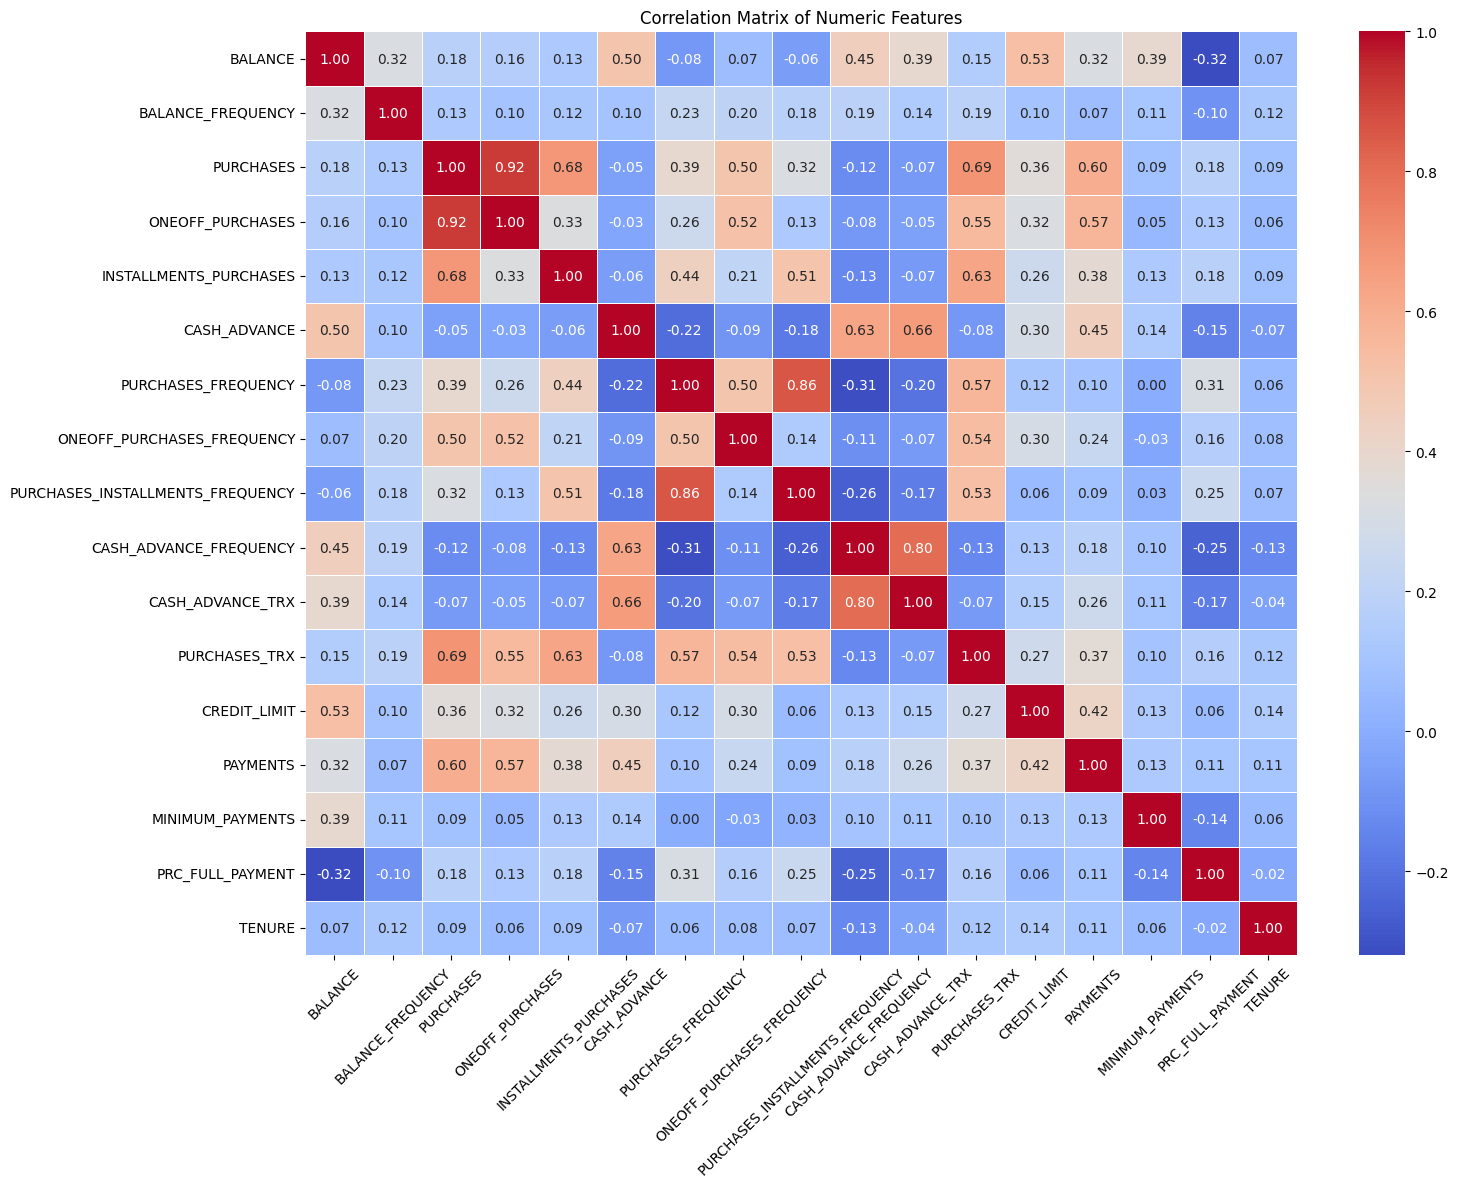

In [10]:
# -----------------------------------------
# Step: Compute Correlation Matrix for Numeric Features
# -----------------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
correlation_matrix
# -----------------------------------------
# Step: Visualize Correlation Matrix with Values
# -----------------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,            
            fmt=".2f",             
            cmap="coolwarm",       
            linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# The correlation matrix reveals strong positive relationships between purchase-related variables

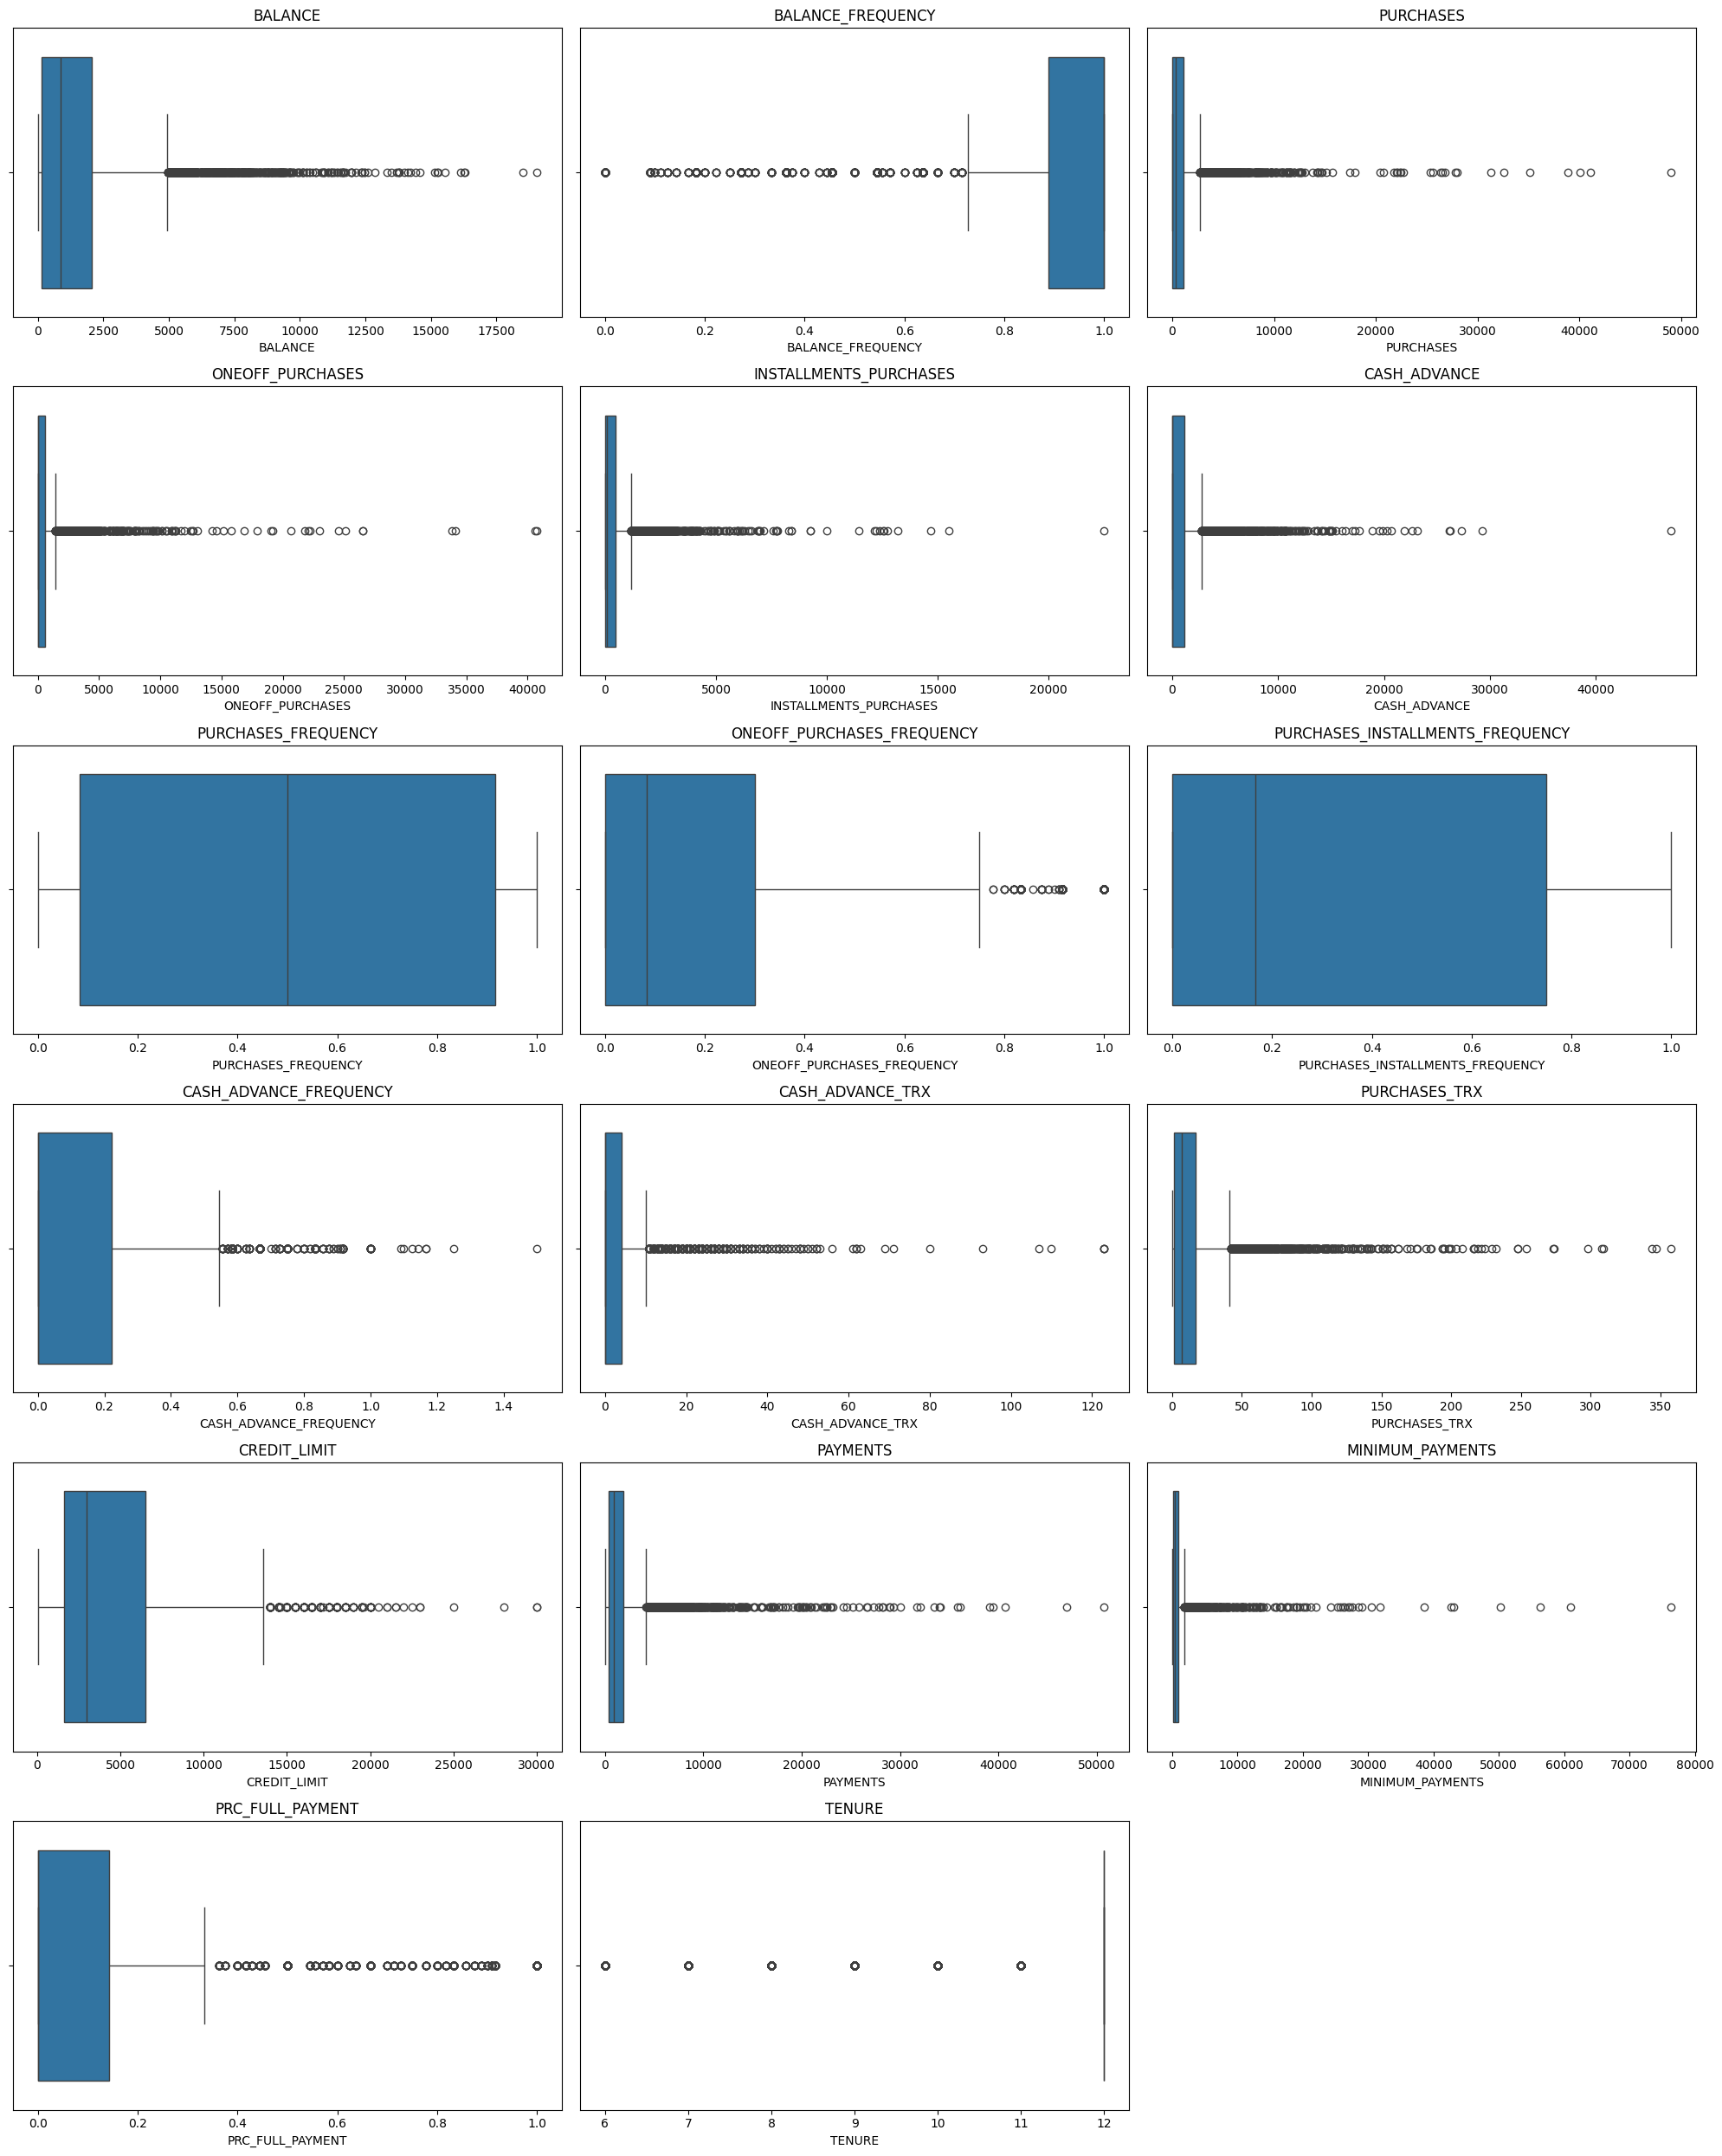

,Number of Outliers
BALANCE_FREQUENCY,1493
PRC_FULL_PAYMENT,1474
TENURE,1366
CASH_ADVANCE,1030
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
PAYMENTS,808
PURCHASES,808
CASH_ADVANCE_TRX,804
ONEOFF_PURCHASES_FREQUENCY,782


In [11]:
# -----------------------------------------
# Step: Detect Outliers Visually Using Boxplots
# -----------------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 25))
for i, column in enumerate(numeric_df.columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=numeric_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


# Create empty dictionary to store outlier counts
outlier_summary = {}

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[column] < lower_bound) |
                          (numeric_df[column] > upper_bound)]
    outlier_summary[column] = len(outliers)
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index',
                                    columns=['Number of Outliers'])
outlier_df.sort_values(by='Number of Outliers', ascending=False)

# Outlier analysis using the IQR method revealed a substantial number of extreme values across multiple features. 
# In several variables, more than 15% of observations were identified as outliers. 
# These values likely represent genuine customer behavioral variability rather than data errors. 
# Therefore, instead of removing these observations, appropriate feature scaling will be applied to reduce their impact on distance-based clustering.

## **2. Data Preparation**

In [ ]:
# -----------------------------------------
# Drop irrelevant or non-informative columns
# -----------------------------------------
print("Columns before dropping:")
print(df.columns)

# Drop CUST_ID because:
# - It is a unique identifier
# - It does not represent customer behavior
# - It should not be used in clustering
df = df.drop("CUST_ID", axis=1)
# Display column names after dropping
print("\nColumns after dropping CUST_ID:")
print(df.columns)


Columns before dropping:
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='str')

Columns after dropping CUST_ID:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='str')


In [13]:
# -----------------------------------------
# Step: Check for Remaining Categorical Features
# -----------------------------------------
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features Remaining:")
print(categorical_features)
print("Number of Categorical Features:", len(categorical_features))
# After removing the CUST_ID column, no categorical features remain in the dataset.
# Therefore, no encoding was required, and all remaining features are already in numeric format.

Categorical Features Remaining:
Index([], dtype='str')
Number of Categorical Features: 0


In [14]:
# -----------------------------------------
# Step: Scale Numeric Features
# -----------------------------------------
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)
print("First 5 rows of scaled data:")
X_scaled.head()
# -----------------------------------------
# Step: Verify Scaling
# -----------------------------------------
scaled_summary = X_scaled.describe().T
scaled_summary[["mean", "std"]]
# Since Agglomerative Clustering relies on Euclidean distance, feature scaling was performed to ensure all variables contribute equally to distance calculations.
# StandardScaler was applied to transform all numeric features to a standardized scale with mean 0 and standard deviation 1.

First 5 rows of scaled data:


,mean,std
BALANCE,-2.540488e-17,1.000056
BALANCE_FREQUENCY,1.587805e-16,1.000056
PURCHASES,3.175610e-18,1.000056
ONEOFF_PURCHASES,-6.033659e-17,1.000056
INSTALLMENTS_PURCHASES,3.175610e-17,1.000056
CASH_ADVANCE,-6.351220e-18,1.000056
PURCHASES_FREQUENCY,9.328354e-17,1.000056
ONEOFF_PURCHASES_FREQUENCY,1.905366e-17,1.000056
PURCHASES_INSTALLMENTS_FREQUENCY,5.716098e-17,1.000056
CASH_ADVANCE_FREQUENCY,-1.595744e-16,1.000056


In [15]:
# -----------------------------------------
# Step: Verify No Missing Values Exist
# -----------------------------------------
total_missing = df.isnull().sum().sum()
print("Total Missing Values in Dataset:", total_missing)
print("\nMissing Values Per Column:")
print(df.isnull().sum())
# -----------------------------------------
# Step: Verify All Features Are Numeric
# -----------------------------------------
print("Data Types of All Features:")
print(df.dtypes)
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
print("\nNon-Numeric Columns Remaining:")
print(non_numeric_columns)
# The dataset was validated after preprocessing.
# All missing values were successfully handled, and no null values remain.
# Additionally, all features are numeric, ensuring compatibility with distance-based Agglomerative Clustering.

Total Missing Values in Dataset: 0

Missing Values Per Column:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Data Types of All Features:
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                  

## **3. Apply Agglomerative Clustering**

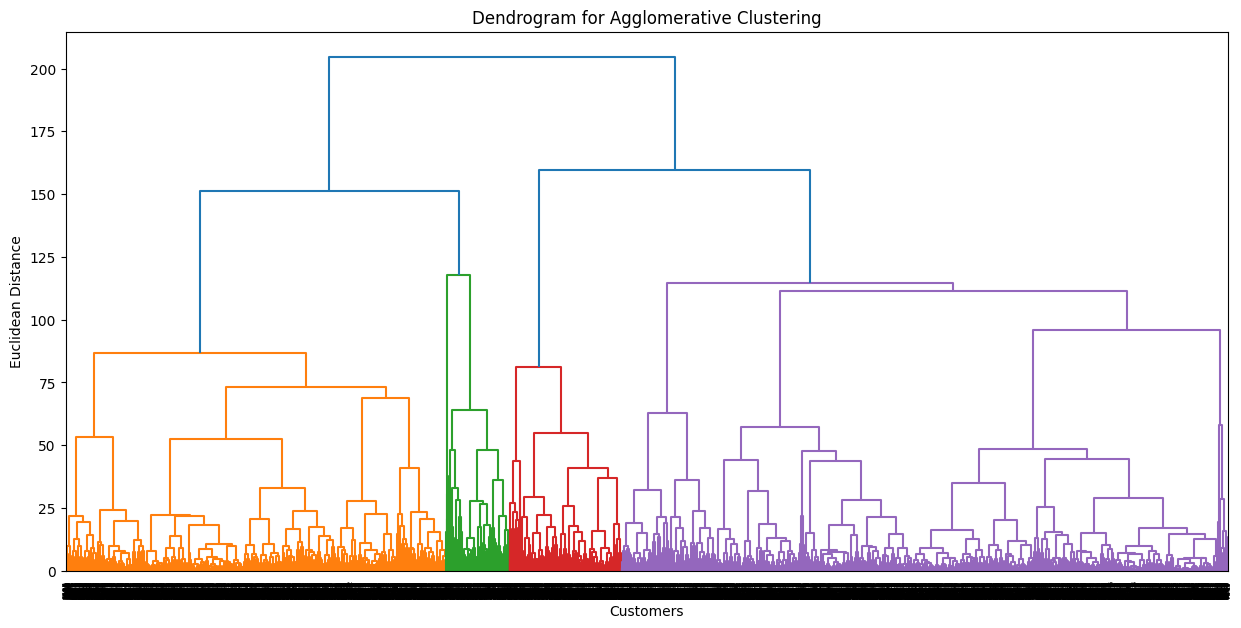

In [16]:
# -----------------------------------------
#Plot Dendrogram
# -----------------------------------------
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward')
)

plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [17]:
# -----------------------------------------
# Apply Agglomerative Clustering
# -----------------------------------------
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(
    n_clusters=6,
    linkage='ward'
)

cluster_labels = agg_model.fit_predict(X_scaled)
df["Cluster"] = cluster_labels
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [18]:
# Agglomerative Clustering using Ward linkage was applied to the standardized dataset.
# The number of clusters was determined using the dendrogram method.
# Customers were grouped into 6 distinct clusters based on Silhouette scores.

## **4. Visualize the Clustering Results**

In [ ]:
# -----------------------------------------
# Analyze Cluster Distribution
# -----------------------------------------
cluster_counts = df["Cluster"].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
Cluster
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64


## **5. Evaluate the Clustering**

In [ ]:
# -----------------------------------------
# Compare Silhouette Scores for Different k Values
# -----------------------------------------
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
k_values = range(2, 9)
silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)  
    silhouette_scores.append(score)
    print(f"Number of Clusters: {k}, Silhouette Score: {round(score, 4)}")

Number of Clusters: 2, Silhouette Score: 0.1775
Number of Clusters: 3, Silhouette Score: 0.1731
Number of Clusters: 4, Silhouette Score: 0.1547
Number of Clusters: 5, Silhouette Score: 0.1581
Number of Clusters: 6, Silhouette Score: 0.1734
Number of Clusters: 7, Silhouette Score: 0.1564
Number of Clusters: 8, Silhouette Score: 0.152


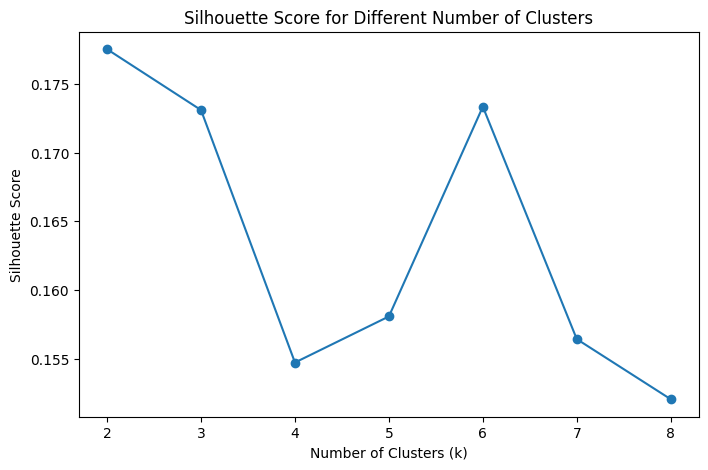

In [ ]:
# -----------------------------------------
#Plot Silhouette Score vs Number of Clusters
# -----------------------------------------

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [22]:
# Silhouette analysis was conducted for k values ranging from 2 to 8.
#  The highest silhouette score was obtained at k = 2 (0.1775), followed closely by k = 6 (0.1734).
# Although k = 2 yields the maximum score, it results in very broad segmentation.
# The difference in silhouette values between k = 2 and k = 6 is minimal, indicating comparable cluster quality. 
# Therefore, k = 6 was selected to achieve a more detailed and meaningful customer segmentation while maintaining acceptable clustering performance.

## **6. Explain whether the clustering quality and justify your reasoning**

In [23]:
# The clustering quality can be considered acceptable but not strong, based on both the silhouette score (0.1734 for k = 6) and the cluster distribution.
# A silhouette score around 0.17 indicates weak but positive cluster separation, 
# meaning that customers are grouped better than random assignment, but there is noticeable overlap between segments. 
# The distribution of clusters shows that two clusters (0 and 1) contain the majority of customers (3946 and 2931 respectively),
# while some clusters are moderately sized (864, 722, 464), 
# and one cluster (Cluster 4 with 23 customers) is very small. 
# This imbalance suggests that the algorithm identified one very distinct niche segment along with several broader behavioral groups.
#  Given that the dataset represents complex financial behavior with naturally overlapping patterns, perfectly separated clusters are not expected.
#   Therefore, despite moderate silhouette values and unequal cluster sizes, the clustering solution is reasonable and suitable for exploratory customer segmentation.